In [17]:

# bootstrap plot: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.bootstrap_plot.html


import os
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import bootstrap_plot
#import plotly.plotly as py
#import plotly
#import plotly.figure_factory as ff
import datetime
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import numpy as np
from matplotlib.dates import DateFormatter


# plotly.tools.set_config_file(world_readable=True, sharing="public")


path = "./src/Data/Test"

all_files = []
for root,d_names,f_names in os.walk(path):
    for f in f_names:
        all_files.append(os.path.join(root, f))
#print("all files = %s" %all_files)

def getDFForDataSource(data_source):
    file_list_a = []
    for f in all_files:
        if "A-" + data_source + ".csv" in f:
            file_list_a.append(f)
    df_a = pd.concat([pd.read_csv(f,  delimiter=";") for f in file_list_a ], sort=True)
    file_list_b = []
    for f in all_files:
        if "B-" + data_source + ".csv" in f:
            file_list_b.append(f)
    df_b = pd.concat([pd.read_csv(f,  delimiter=";") for f in file_list_b ], sort=True)
    file_list_c = []
    for f in all_files:
        if "C-" + data_source + ".csv" in f:
            file_list_c.append(f)
    df_c = pd.concat([pd.read_csv(f,  delimiter=";") for f in file_list_c ], sort=True)
    df_a["segment"] = "A"
    df_b["segment"] = "B"
    df_c["segment"] = "C"
    return pd.concat([df_a, df_b, df_c], sort=True)


# get data frame for data source from CSV files
proximity_df = getDFForDataSource("proximity")
sensors_df = getDFForDataSource("sensors")
acceleration_df = getDFForDataSource("acceleration")
floor_df = getDFForDataSource("floor")


activities_df = pd.read_csv("./src/labels_testing_set.csv",  delimiter=",")
activities_df["TIMESTAMP"] = pd.to_datetime(activities_df["TIMESTAMP"])
activities = pd.read_csv("./src/activities.csv", delimiter=",")
activities_df = pd.merge(activities_df, activities, on="ACTIVITY")
print(activities_df.head())




            TIMESTAMP ACTIVITY SEGMENT Activity Name
0 2017-11-09 12:03:30    Act24       A       Wake up
1 2017-11-09 12:04:00    Act24       A       Wake up
2 2017-11-09 12:04:30    Act24       A       Wake up
3 2017-11-13 11:52:00    Act24       A       Wake up
4 2017-11-13 11:52:30    Act24       A       Wake up


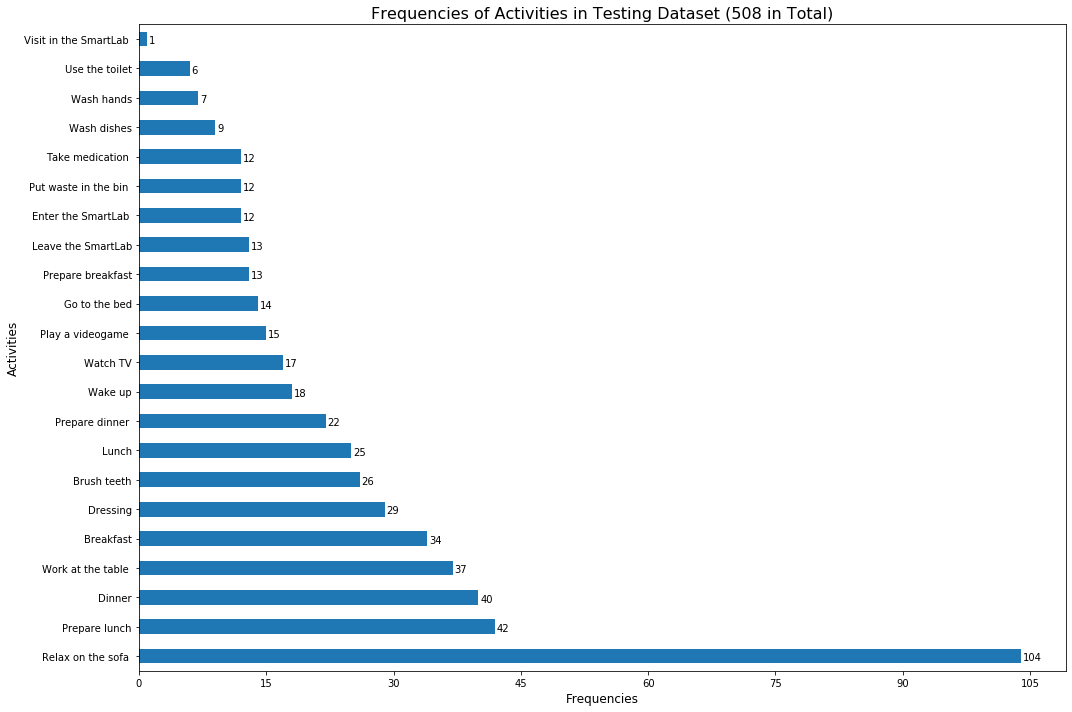

In [18]:
# activities frequencies

activity_occurrences = activities_df["Activity Name"].value_counts()
# TODO: add missing two activities: Act08: Eat a snack, Put washing into washing machine

# get sum of samples
sum_occurrences = activity_occurrences.sum(axis = 0, skipna = True) 


ax = activity_occurrences.plot.barh(figsize=(15,10))
ax.set_title("Frequencies of Activities in Testing Dataset (" + str(sum_occurrences) + " in Total)", fontsize=16) 
ax.set_xlabel("Frequencies",fontsize =12)
ax.set_ylabel("Activities", fontsize =12)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

x_offset = 0.2
y_offset = -0.4
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.x1 + b.x0)  
    ax.annotate(val, ((b.x0 + b.x1) + x_offset, b.y1 + y_offset))

plt.tight_layout()
plt.savefig('./src/figures/frequencies-test.png')


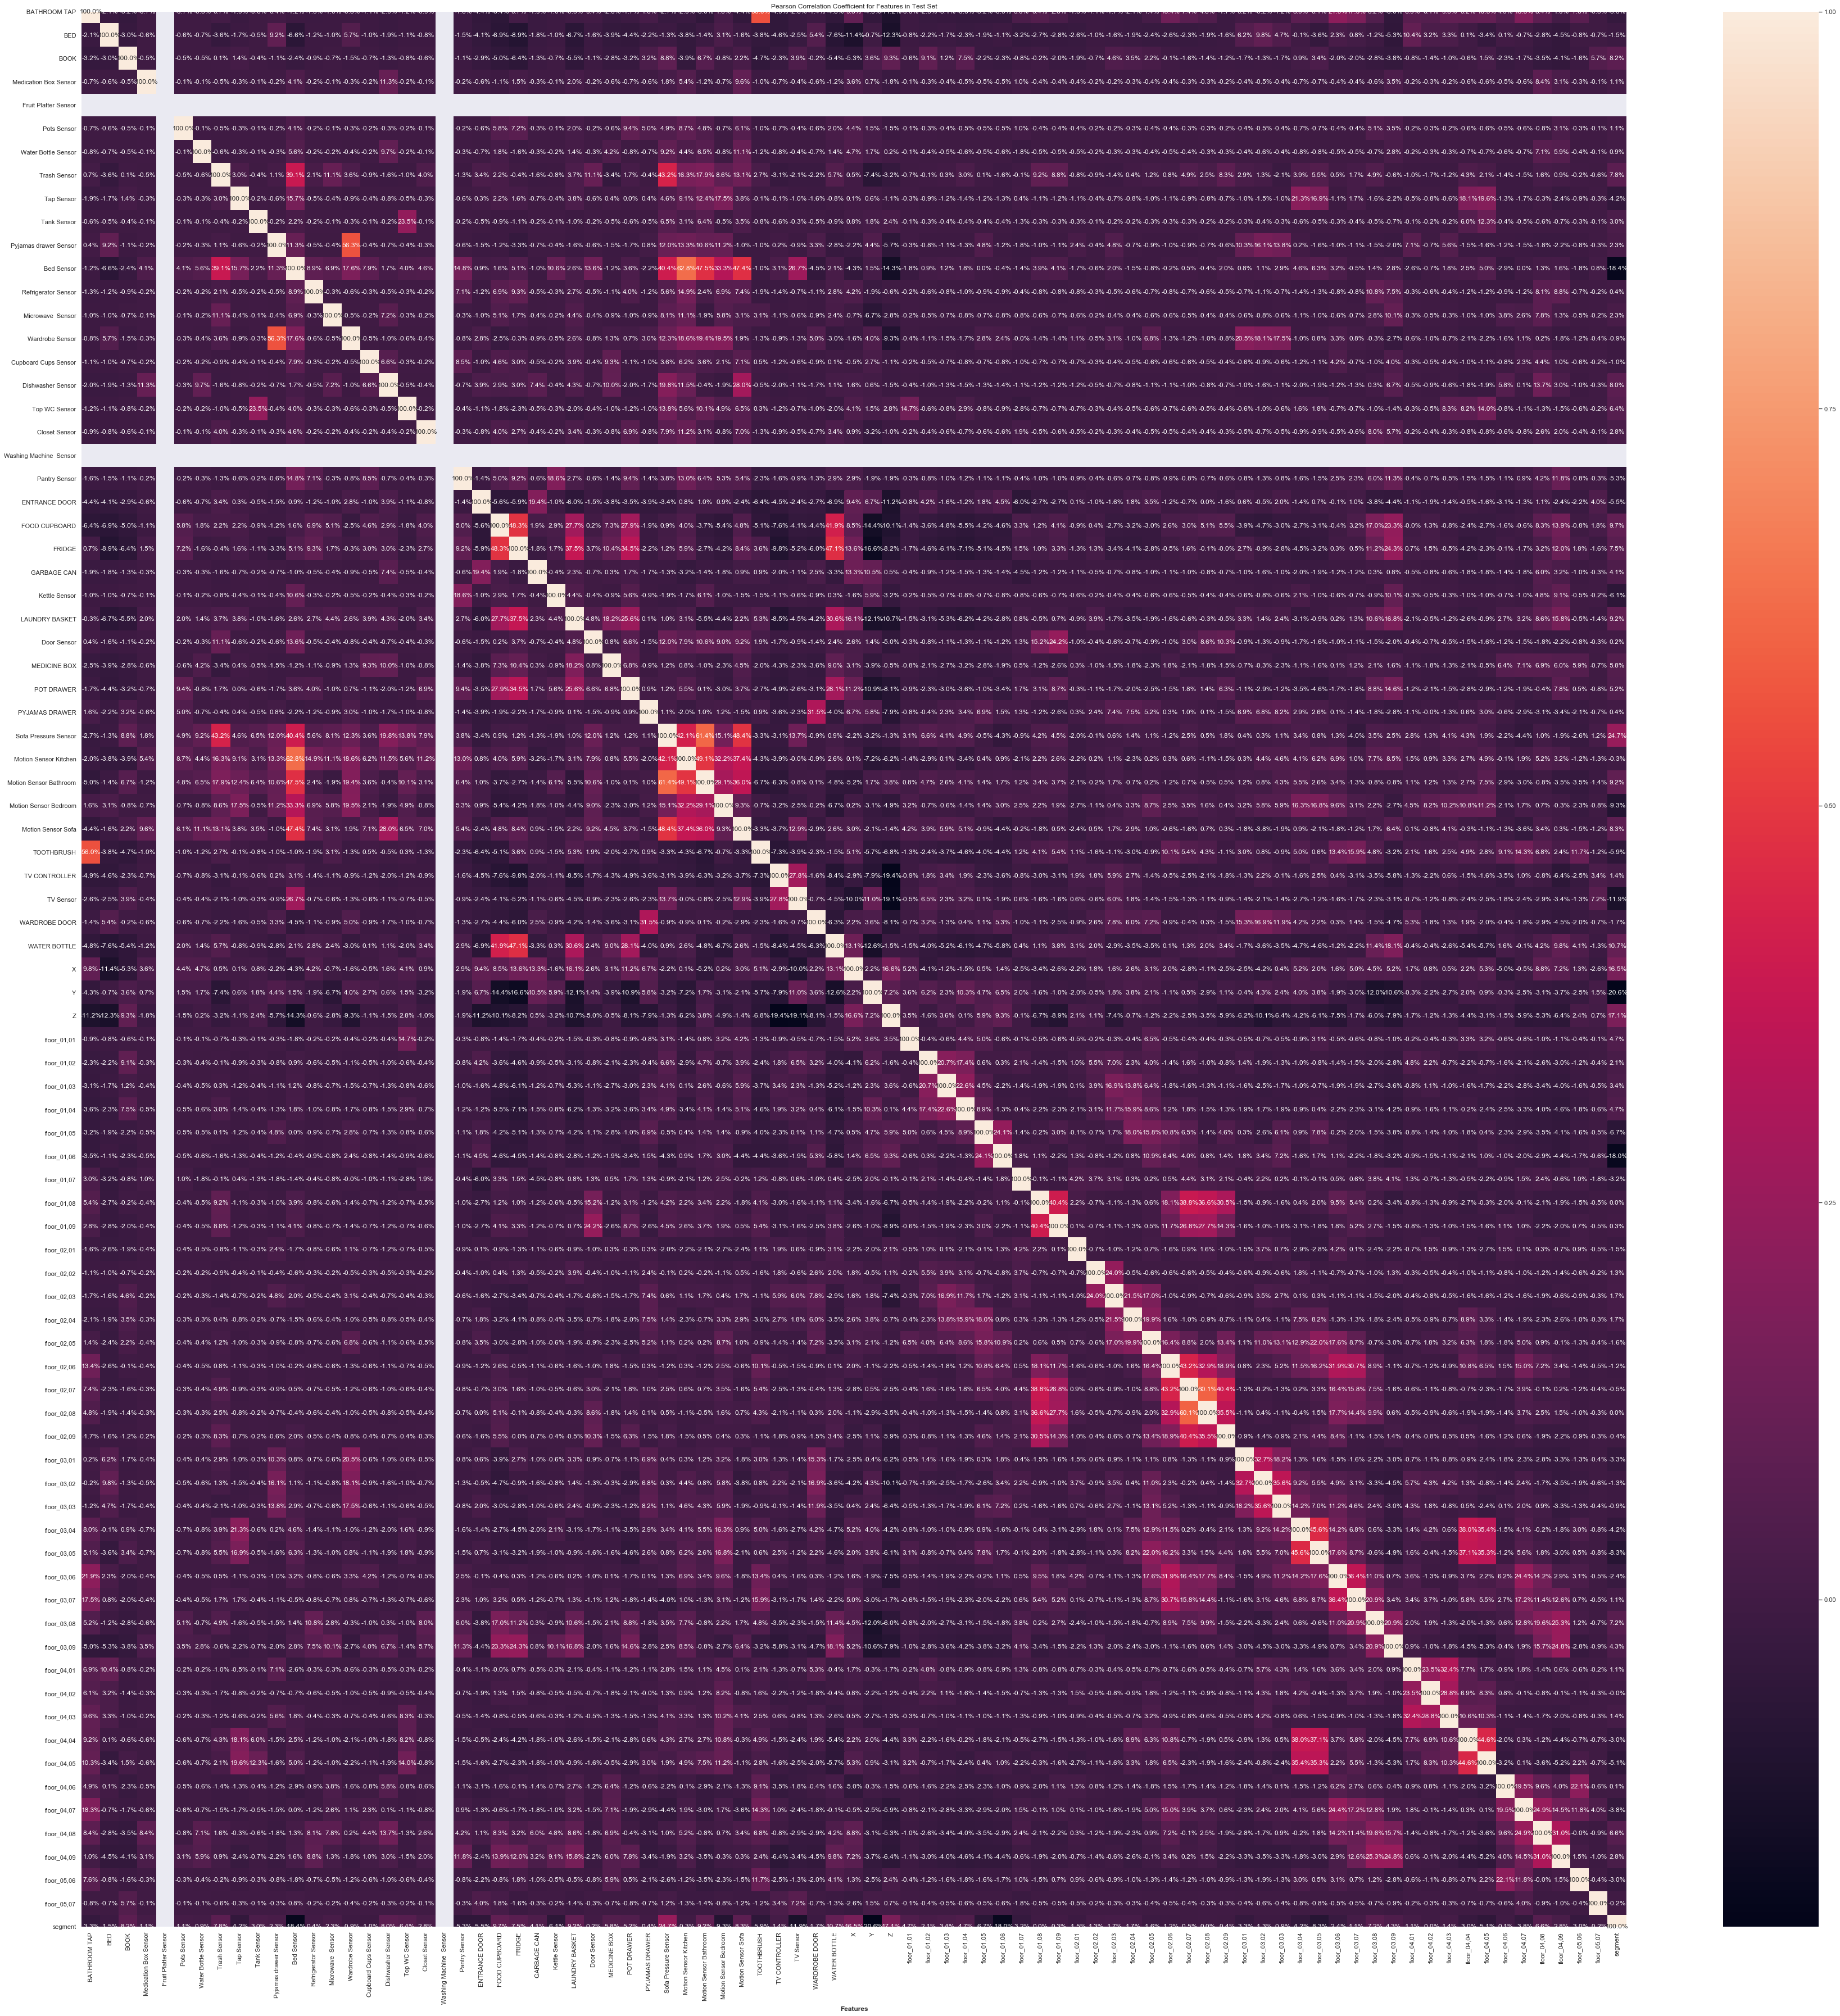

In [19]:
raw_data = pd.read_csv("./src/samples-testing.csv",  delimiter=";")
raw_data["TIMESTAMP"] = pd.to_datetime(raw_data["TIMESTAMP"])
pearson_data = raw_data.drop(["TIMESTAMP"], axis=1).drop(["activity"], axis=1)
pearson_correlation = pearson_data.corr(method="pearson")

sns.set()
plt.figure(figsize = (50,50))
ax = sns.heatmap(pearson_correlation, annot=True, fmt=".1%")
plt.xlabel('Features', fontweight='bold')
plt.title("Pearson Correlation Coefficient for Features in Test Set")
plt.tight_layout()
plt.savefig('./src/figures/pearson-testing.png')

In [19]:
# from sklearn.decomposition import PCA
# pca = PCA()
# pca.fit(pearson_data)
# X_pca = pca.transform(pearson_data)
# print("original shape:   ", pearson_data.shape)
# print("transformed shape:", X_pca.shape)
# print(pearson_data)
# print(X_pca)


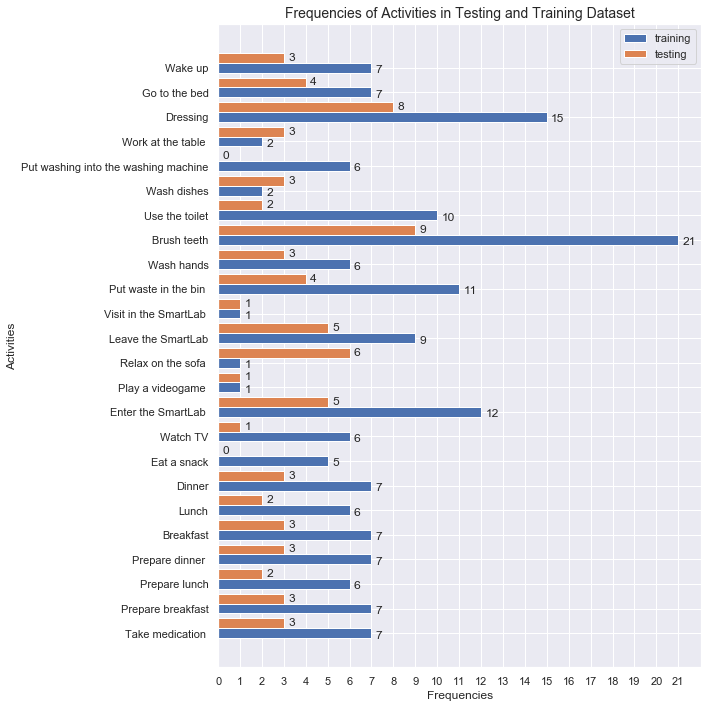

In [97]:
# activities frequencies

activity_frequencies = pd.read_csv("./src/frequencies.csv", delimiter=",")


activity_training_occurrences = activity_frequencies["training"]
activity_testing_occurrences = activity_frequencies["testing"]


# get sum of samples
sum_training_occurrences = activity_training_occurrences.sum(axis = 0, skipna = True) 
sum_testing_occurrences = activity_testing_occurrences.sum(axis = 0, skipna = True) 

barwidth = 0.4

r1 = np.arange(len(activity_training_occurrences))
r2 = [x + barwidth for x in r1]

x_ticks = np.arange(activity_training_occurrences.max()+1)

plt.barh(r1, activity_training_occurrences, height=barwidth, edgecolor='white',label="training")
plt.barh(r2, activity_testing_occurrences, height=barwidth, edgecolor='white',label="testing")


plt.xlabel("Frequencies", fontdict=dict(fontsize=12))
plt.ylabel("Activities")
plt.yticks(np.arange(24), activity_frequencies["activity"])
plt.xticks(x_ticks, x_ticks)
plt.title("Frequencies of Activities in Testing and Training Dataset", fontsize=14) 

for index,data in enumerate(activity_training_occurrences):
    plt.text(y=index-0.2, x =data+0.2 , s=f"{data}" , fontdict=dict(fontsize=12))
    
for index,data in enumerate(activity_testing_occurrences):
    plt.text(y=index+0.3 , x =data+0.2, s=f"{data}" , fontdict=dict(fontsize=12))

plt.legend()
plt.tight_layout()
plt.rcParams["figure.figsize"] = (10,10)
plt.savefig('./src/figures/frequencies.png')
plt.savefig('./src/figures/frequencies.pgf')


